# Prise de connaissance du dataset et premier nettoyage global

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# import des datas de 2015 et résumé
d_2015 = pd.read_csv("./archive/2015-building-energy-benchmarking.csv")
d_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [3]:
# aperçu du dataset de 2015
pd.set_option("display.max_columns", None)

d_2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
# import des datas de 2016 et résumé
d_2016 = pd.read_csv("./archive/2016-building-energy-benchmarking.csv")
d_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
d_2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


On peut qu'il y a des différences entre les variables des deux datasets

Je vais mettre en avant ces différences

In [6]:
diff_15notin16 = [x for x in d_2015.columns if x not in d_2016.columns]
diff_16notin15 = [x for x in d_2016.columns if x not in d_2015.columns]
print(diff_15notin16)
print(diff_16notin15)

['Location', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes']
['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude', 'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


On peut voir clairement des similitudes qu'il faut explorer

In [7]:
print(f"d_2015 => Location\n{d_2015['Location'][0]}")

print(f"d_2016")
print(f"Latitude: {d_2016['Latitude'][0]}")
print(f"Longitude: {d_2016['Longitude'][0]}")
print(f"Address: {d_2016['Address'][0]}")
print(f"City: {d_2016['City'][0]}")
print(f"State: {d_2016['State'][0]}")
print(f"ZipCode: {d_2016['ZipCode'][0]}")


d_2015 => Location
{'latitude': '47.61219025', 'longitude': '-122.33799744', 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}
d_2016
Latitude: 47.6122
Longitude: -122.33799
Address: 405 Olive way
City: Seattle
State: WA
ZipCode: 98101.0


A première vue, seules la latitude, la longitude et le zipcode peuvent m'intéresser pour d'éventuels clusters

In [8]:
com2015 = d_2015[d_2015["Comment"].notna()]["Comment"]
print(f"Comment 2015:\n{com2015}")
com2016 = d_2016[d_2016["Comments"].notna()]["Comments"]
print(f"Comment 2016:\n{com2016}")

Comment 2015:
62      Under construction starting 6/2013 (old buildi...
436     Part of McKinstry's campus, property operates ...
437     One of two office buildings on McKinstry's cam...
595     Part of McKinstry’s campus, this remodeled war...
719     Construction completed in mid 2015. The buildi...
1358    Under construction starting 6/2013 (old buildi...
1360    Under construction starting 6/2013 (old buildi...
1373    Under construction starting 6/2015 (old buildi...
2108    Under construction starting 09/2014 (old build...
2230    Part of McKinstry's campus, the office space f...
2319    Part of McKinstry's campus, property includes ...
2381    Property now has two buildings: Thornton Creek...
2641    Recent energy efficiency upgrades include repl...
Name: Comment, dtype: object
Comment 2016:
Series([], Name: Comments, dtype: float64)


Pas de commentaire pour le dataset 2016 et pas sûr de garder celui de 2015 si pas de données pertinentes

In [9]:
print(f"2015")
print(f"GHGEmissions(MetricTonsCO2e): {d_2015['GHGEmissions(MetricTonsCO2e)'][0]}")
print(f"GHGEmissionsIntensity(kgCO2e/ft2): {d_2015['GHGEmissionsIntensity(kgCO2e/ft2)'][0]}")
print(f"2016")
print(f"TotalGHGEmissions: {d_2016['TotalGHGEmissions'][0]}")
print(f"GHGEmissionsIntensity: {d_2016['GHGEmissionsIntensity'][0]}")

2015
GHGEmissions(MetricTonsCO2e): 249.43
GHGEmissionsIntensity(kgCO2e/ft2): 2.64
2016
TotalGHGEmissions: 249.98
GHGEmissionsIntensity: 2.83


Les données semblent similaires. Il faut confirmer cela avec les métadonnées si possible

In [10]:
print(f"2015 => Zipcode: {d_2015['Zip Codes'][0]}")
print(f"2016 => Zipcode: {d_2016['ZipCode'][0]}")

2015 => Zipcode: 18081
2016 => Zipcode: 98101.0


Il semble y avoir une diférence de format

Le zipcode du dataset de 2016 correspond à celui affiché dans la variable location du dataset de 2015

Après recherche, le zipcode de Seattle est bien du format 98xxx

In [11]:
# import des métadonnées de 2015-2026 et récupération des données permettant de joindre les deux datasets
import json

with open("./archive/socrata_metadata_2015-building-energy-benchmarking.json", "r") as file:
    j_2015 = json.load(file)
with open("./archive/socrata_metadata_2016-building-energy-benchmarking.json", "r") as file:
    j_2016 = json.load(file)

nb_col_2015 = len(d_2015.columns)
nb_col_2016 = len(d_2016.columns)

tofind_2015 = ['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)']
tofind_2016 = ['TotalGHGEmissions', 'GHGEmissionsIntensity']

#columns=>nb_columns (len(dataset.columns))=>"name","description" if exists

for tf15, tf16 in zip(tofind_2015, tofind_2016):
    for col15 in range(nb_col_2015):
        if j_2015["columns"][col15]["name"] == tf15:
            print(tf15)
            print(f"Description: {j_2015['columns'][col15]['description']}")
            for col16 in range(nb_col_2016):
                if j_2016["columns"][col16]["name"] == tf16:
                    print(tf16)
                    print(f"Description: {j_2016['columns'][col16]['description']}")
    print()


GHGEmissions(MetricTonsCO2e)
Description: The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions factor of 52.44 lbs CO2e/MWh. Enwave steam factor = 170.17 lbs CO2e/MMBtu. Gas factor sourced from EPA Portfolio Manager = 53.11 kg CO2e/MBtu. 
TotalGHGEmissions
Description: The total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent. This calculation uses a GHG emissions factor from Seattle CIty Light's portfolio of generating resources. This uses Seattle City Light's 2015 emissions f

Je peux créer les variables "latitude", "longitude" et "zipcode" à partir de "location" dans le dataset de 2015 et droper cette dernière, "address", "city", "state", "Zip codes" après un merge

Idem pour 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)' et 'TotalGHGEmissions', 'GHGEmissionsIntensity'

In [12]:
import re

def get_json(txt):
    txt = re.sub("'{", "{", txt)
    txt = re.sub("}'", "}", txt)
    txt = re.sub("'", "\"", txt)
    return txt

cols = ['ZipCode', 'Latitude', 'Longitude']

file = d_2015["Location"].apply(get_json)

d_2015["Latitude"] =  file.apply(lambda x: float(json.loads(x)["latitude"]))
d_2015["Longitude"] =  file.apply(lambda x: float(json.loads(x)["longitude"]))
d_2015["ZipCode"] =  file.apply(lambda x: float(json.loads(x)["human_address"]["zip"]))


In [13]:
d_2016 = d_2016.rename(columns={"Comments": "Comment"})
d_2016["Comment"] = d_2016["Comment"].astype(object)


Récupération des bâtiments présents dans les dataset 2016 et 2015 puis drop de cas batiments dans le dataset 2016 avant un merge

In [14]:
bat_in1516 = sorted([x for x in d_2016["OSEBuildingID"] if x in d_2015["OSEBuildingID"].values])
bat_notin1516 = [x for x in d_2016["OSEBuildingID"] if x not in d_2015["OSEBuildingID"].values]


In [15]:
bat_2015 = d_2015[d_2015["OSEBuildingID"].isin(bat_in1516)].copy().sort_values(by= "OSEBuildingID").reset_index(drop=True)
bat_2016 = d_2016[d_2016["OSEBuildingID"].isin(bat_in1516)].copy().sort_values(by= "OSEBuildingID").reset_index(drop=True)


In [16]:
d_notin1516 = d_2016[d_2016["OSEBuildingID"].isin(bat_notin1516)].copy().reset_index(drop=True)


In [17]:
d_full = d_2015.merge(d_notin1516, how="outer")
d_full.head()


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,ZipCode,Address,City,State,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081.0,47.612190,-122.337997,98101.0,NaN,NaN,NaN,NaN,NaN
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081.0,47.613106,-122.333358,98101.0,NaN,NaN,NaN,NaN,NaN
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081.0,47.613349,-122.337699,98101.0,NaN,NaN,NaN,NaN,NaN
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081.0,47.614216,-122.336609,98101.0,NaN,NaN,NaN,NaN,NaN
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576.0,47.613754,-122.340924,98121.0,NaN,NaN,NaN,NaN,NaN


In [18]:
d_full['TotalGHGEmissions'] = d_full['TotalGHGEmissions'].mask(d_full['TotalGHGEmissions'].isnull(), 
    d_2015['GHGEmissions(MetricTonsCO2e)'])
d_full['GHGEmissionsIntensity'] = d_full['GHGEmissionsIntensity'].mask(d_full['GHGEmissionsIntensity'].isnull(), 
    d_2015['GHGEmissionsIntensity(kgCO2e/ft2)'])


In [19]:
# drop des colonnes devenues non nécessaires
n_full = d_full.drop(["Location", "Address", "City", "State", "Zip Codes", 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)'], axis=1)
n_full = n_full.sort_values(by= "OSEBuildingID").reset_index(drop=True)
n_full.head()


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Latitude,Longitude,ZipCode,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,47.612190,-122.337997,98101.0,249.43,2.64
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,47.613106,-122.333358,98101.0,263.51,2.38
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,47.613349,-122.337699,98101.0,2061.48,1.92
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,47.614216,-122.336609,98101.0,1936.34,31.38
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,47.613754,-122.340924,98121.0,507.70,4.02


3284
ajouter colonne diff conso 2015->2016

SiteEUI(kBtu/sf)	SiteEUIWN(kBtu/sf)	SourceEUI(kBtu/sf)	SourceEUIWN(kBtu/sf)	SiteEnergyUse(kBtu)	SiteEnergyUseWN(kBtu)	SteamUse(kBtu)	Electricity(kWh)	Electricity(kBtu)	NaturalGas(therms)	NaturalGas(kBtu)	OtherFuelUse(kBtu)	GHGEmissions(MetricTonsCO2e)	GHGEmissionsIntensity(kgCO2e/ft2)

In [20]:
n_full["SiteEUI(kBtu/sf)_diff1516"] = bat_2016.loc[:, "SiteEUI(kBtu/sf)"] - bat_2015.loc[:, "SiteEUI(kBtu/sf)"]
n_full["SiteEUIWN(kBtu/sf)_diff1516"] = bat_2016.loc[:, "SiteEUIWN(kBtu/sf)"] - bat_2015.loc[:, "SiteEUIWN(kBtu/sf)"]
n_full["SourceEUI(kBtu/sf)_diff1516"] = bat_2016.loc[:, "SourceEUI(kBtu/sf)"] - bat_2015.loc[:, "SourceEUI(kBtu/sf)"]
n_full["SourceEUIWN(kBtu/sf)_diff1516"] = bat_2016.loc[:, "SourceEUIWN(kBtu/sf)"] - bat_2015.loc[:, "SourceEUIWN(kBtu/sf)"]
n_full["SiteEnergyUse(kBtu)_diff1516"] = bat_2016.loc[:, "SiteEnergyUse(kBtu)"] - bat_2015.loc[:, "SiteEnergyUse(kBtu)"]
n_full["SiteEnergyUseWN(kBtu)_diff1516"] = bat_2016.loc[:, "SiteEnergyUseWN(kBtu)"] - bat_2015.loc[:, "SiteEnergyUse(kBtu)"]
n_full["SteamUse(kBtu)_diff1516"] = bat_2016.loc[:, "SteamUse(kBtu)"] - bat_2015.loc[:, "SteamUse(kBtu)"]
n_full["Electricity(kWh)_diff1516"] = bat_2016.loc[:, "Electricity(kWh)"] - bat_2015.loc[:, "Electricity(kWh)"]
n_full["Electricity(kBtu)_diff1516"] = bat_2016.loc[:, "Electricity(kBtu)"] - bat_2015.loc[:, "Electricity(kBtu)"]
n_full["NaturalGas(therms)_diff1516"] = bat_2016.loc[:, "NaturalGas(therms)"] - bat_2015.loc[:, "NaturalGas(therms)"]
n_full["NaturalGas(kBtu)_diff1516"] =  bat_2016.loc[:, "NaturalGas(kBtu)"] - bat_2015.loc[:, "NaturalGas(kBtu)"]
n_full["TotalGHGEmissions_diff1516"] = bat_2016.loc[:, "TotalGHGEmissions"] - bat_2015.loc[:, "GHGEmissions(MetricTonsCO2e)"]
n_full["GHGEmissionsIntensity_diff1516"] = bat_2016.loc[:, "GHGEmissionsIntensity"] - bat_2015.loc[:, "GHGEmissionsIntensity(kgCO2e/ft2)"]


# Prise de connaissance des types de bâtiments

1. Filtre des types de bâtiments de la variable "BuildingType"
2. Recoupement des résultats avec la variable "PrimaryPropertyType"
3. Trouver les cas spécifiques cachés dans les variables "LargestPropertyUseType", "SecondLargestPropertyUseType" et "ThirdLargestPropertyUseType"

In [21]:
print(n_full["BuildingType"].unique())


['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']


In [22]:
import re

n_full["BuildingType"] = n_full["BuildingType"].apply(lambda x: x.lower())
n_full["BuildingType"] = n_full["BuildingType"].apply(lambda x: re.sub(r".*nonresidential.*", "nonresidential", x))
n_full["BuildingType"] = n_full["BuildingType"].apply(lambda x: re.sub(r".*multifamily.*", "multifamily", x))

## 2. Recoupement des résultats

In [23]:
def reg(txt):
    searched = re.search(r"(.*)", txt)
    remplaced = re.sub(txt, searched.group(), txt)
    n_remplaced = re.sub(r"\s", "", remplaced)
    return n_remplaced

In [24]:
n_full["PrimaryPropertyType"] = n_full["PrimaryPropertyType"].apply(reg)

In [25]:
def building_info(datas, search):
    idx = datas.index[datas["BuildingType"].str.contains(search)]
    d = datas.loc[idx, :].groupby(["BuildingType", "PrimaryPropertyType"]).size().reset_index().rename(columns={0: "count"})
    d_pivot = d.pivot(index="BuildingType", columns="PrimaryPropertyType", values="count")

    return idx, d_pivot

In [26]:
nonresid_idx, nonresid_pivot = building_info(n_full, "nonresidential")
multif_idx, multif_pivot = building_info(n_full, "multifamily")
sps_idx, sps_pivot = building_info(n_full, "sps-district")
campus_idx, campus_pivot = building_info(n_full, "campus")


Les indexes de chacune des catégories ont été récupérées. Il en va de même pour les valeurs de "PrimaryPropertyType" liées à ces catégories

Il faut vérifier la présence d'éventuels outliers à l'intérieur des catégories

In [27]:
nonresid_pivot.columns

Index(['College/University', 'DistributionCenter', 'Hospital', 'Hotel',
       'K-12School', 'Laboratory', 'LargeOffice', 'Low-RiseMultifamily',
       'MedicalOffice', 'MixedUseProperty', 'Non-RefrigeratedWarehouse',
       'Office', 'Other', 'RefrigeratedWarehouse', 'ResidenceHall',
       'ResidenceHall/Dormitory', 'Restaurant', 'RetailStore',
       'Self-StorageFacility', 'SeniorCareCommunity',
       'Small-andMid-SizedOffice', 'Supermarket/GroceryStore', 'University',
       'Warehouse', 'WorshipFacility'],
      dtype='object', name='PrimaryPropertyType')

* MixedUseProperty => Bâtiments commerciaux avec potentiellement des logements ou autre aux étages supérieurs. Entre au moins en partie dans l'échantillon ciblé

A exclure pour "nonresidential":
* "Low-RiseMultifamily" => logements collectifs de faible hauteur
* "ResidenceHall" => logements étudiants

In [28]:
sps_pivot.columns

Index(['K-12School', 'Other', 'SPS-DistrictK-12'], dtype='object', name='PrimaryPropertyType')

In [29]:
campus_pivot.columns

Index(['College/University', 'K-12School', 'LargeOffice',
       'Low-RiseMultifamily', 'MixedUseProperty', 'Other', 'Restaurant',
       'University'],
      dtype='object', name='PrimaryPropertyType')

A exclure pour "campus":
* "Low-RiseMultifamily"

In [30]:
agg_idx = nonresid_idx.union(sps_idx.union(campus_idx))
n_datas = n_full.loc[agg_idx, :].reset_index(drop=True).copy()
n_datas["PrimaryPropertyType"] = n_datas["PrimaryPropertyType"].apply(lambda x: x.lower())
n_datas["PrimaryPropertyType"] = n_datas["PrimaryPropertyType"].apply(lambda x: re.sub(r".*residencehall.*", "residencehall", x))


Exclusion des individus non destinés à l'habitation dans la variable "PrimaryPropertyType"

In [31]:
n_datas = n_datas[(n_datas["PrimaryPropertyType"] != "low-risemultifamily") & (n_datas["PrimaryPropertyType"] != "residencehall")] \
    .reset_index(drop=True)

## 3. Recherche des cas spécifiques dans les variables "LargestPropertyUseType", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"

Je vais lister les valeurs uniques dans ces trois colonnes. Il n'y a pas besoin de les séparation étant donné que les valeurs sont indifféremment utilisées dans chacune des trois colonnes

In [32]:
list_cols = ["LargestPropertyUseType", "SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"]

list_vals = np.array([])
for col in list_cols:
    n_datas[col] = n_datas[col].apply(lambda x: str(x).lower())
    n_datas[col] = n_datas[col].apply(reg)
    list_vals = np.append(list_vals, n_datas[col].unique())

vals_unique = set(list_vals)
list_vals = list(vals_unique)
print(list_vals)

['bar/nightclub', 'automobiledealership', 'policestation', 'foodsales', 'other-restaurant/bar', 'medicaloffice', 'college/university', 'multifamilyhousing', 'worshipfacility', 'other-lodging/residential', 'retailstore', 'manufacturing/industrialplant', 'prison/incarceration', 'non-refrigeratedwarehouse', 'other', 'outpatientrehabilitation/physicaltherapy', 'movietheater', 'self-storagefacility', 'nan', 'office', 'courthouse', 'hospital(generalmedical&surgical)', 'other-recreation', 'restaurant', 'stripmall', 'residentialcarefacility', 'lifestylecenter', 'other-publicservices', 'vocationalschool', 'repairservices(vehicle,shoe,locksmith,etc)', 'urgentcare/clinic/otheroutpatient', 'firestation', 'other-services', 'adulteducation', 'other-utility', 'datacenter', 'supermarket/grocerystore', 'other-mall', 'other-education', 'residencehall/dormitory', 'performingarts', 'fastfoodrestaurant', 'distributioncenter', 'personalservices(health/beauty,drycleaning,etc)', 'fitnesscenter/healthclub/gym'

Valeurs posant question:
* "residentialcarefacility" => établissement de soins en résidence
* "residencehall/dormitory" => logements étudiants; à exclure
* "other-lodging/residential" => autres logements; à exclure
* "multifamilyhousing" => logements collectifs; à exclure

Je vais lister les valeurs à exclure pour voir leurs proportions 

In [33]:
df_exc = pd.DataFrame()
list_vals_spec = ["residencehall/dormitory", "other-lodging/residential", "multifamilyhousing"]

for col in list_cols:
     df = n_datas[(n_datas[col] == list_vals_spec[0]) | (n_datas[col] == list_vals_spec[1]) |
          (n_datas[col] == list_vals_spec[2])][["BuildingType", "PrimaryPropertyType", 
     "PropertyGFATotal", list_cols[0], "LargestPropertyUseTypeGFA", list_cols[1], "SecondLargestPropertyUseTypeGFA",
     list_cols[2], "ThirdLargestPropertyUseTypeGFA"]]
     df_exc = pd.concat([df_exc, df])

df_exc = df_exc[~df_exc.index.duplicated()]


Je vais calculer la proportion de surface utilisée par chaque type d'utilisation des bâtiments, faire la différence des pourcentages liés au logement et comparer cette différence au pourcentage de surface habitée

In [34]:
df_exc["percLargest"] = round(df_exc["LargestPropertyUseTypeGFA"] / df_exc["PropertyGFATotal"] * 100, 3)
df_exc["percSecond"] = round(df_exc["SecondLargestPropertyUseTypeGFA"] / df_exc["PropertyGFATotal"] * 100, 3)
df_exc["percThird"] = round(df_exc["ThirdLargestPropertyUseTypeGFA"] / df_exc["PropertyGFATotal"] * 100, 3)

In [35]:
n_cols = df_exc.columns.to_list()
print(n_cols)

['BuildingType', 'PrimaryPropertyType', 'PropertyGFATotal', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'percLargest', 'percSecond', 'percThird']


In [36]:
n_cols = n_cols[:5] + n_cols[-3:-2] + n_cols[5:7] + n_cols[-2:-1] + n_cols[7:9] + n_cols[-1:]
df_exc = df_exc[n_cols]
df_exc.head(10)

,BuildingType,PrimaryPropertyType,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,percLargest,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,percSecond,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,percThird
112,nonresidential,other,89821,other-lodging/residential,46483.0,51.751,office,37938.0,42.237,foodservice,4579.0,5.098
161,nonresidential,mixeduseproperty,110785,multifamilyhousing,58563.0,52.862,supermarket/grocerystore,48520.0,43.797,parking,29839.0,26.934
831,nonresidential,mixeduseproperty,41827,multifamilyhousing,14273.0,34.124,office,14128.0,33.777,parking,9680.0,23.143
1103,nonresidential,mixeduseproperty,43878,multifamilyhousing,12000.0,27.349,office,8262.0,18.829,retailstore,6312.0,14.385
1136,nonresidential,other,47836,other-lodging/residential,43336.0,90.593,parking,4500.0,9.407,nan,NaN,NaN
1330,nonresidential,mixeduseproperty,1074552,multifamilyhousing,311521.0,28.991,hotel,303000.0,28.198,parking,141450.0,13.164
1352,nonresidential,mixeduseproperty,32282,multifamilyhousing,12600.0,39.031,parking,6985.0,21.637,other,6576.0,20.370
1358,nonresidential,mixeduseproperty,57600,residencehall/dormitory,27600.0,47.917,multifamilyhousing,16000.0,27.778,financialoffice,7000.0,12.153
1456,nonresidential,other,29820,other-lodging/residential,29820.0,100.000,nan,NaN,NaN,nan,NaN,NaN
1468,nonresidential,mixeduseproperty,20620,multifamilyhousing,10060.0,48.788,retailstore,5280.0,25.606,social/meetinghall,5280.0,25.606


In [37]:
list_cols_perc = ["percLargest", "percSecond", "percThird"]
df_perc_log = pd.DataFrame()

for (col, p) in zip(list_cols, list_cols_perc):
    df = df_exc[(df_exc[col] == list_vals_spec[0]) | (df_exc[col] == list_vals_spec[1]) | (df_exc[col] == list_vals_spec[2])][p]
    
    df_perc_log = pd.concat([df_perc_log, df])

df_exc = df_exc.merge(df_perc_log.groupby(df_perc_log.index).sum(), how="outer", left_index=True, 
    right_index=True).rename(columns={0: "percTT"})

df_exc.head(10)


,BuildingType,PrimaryPropertyType,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,percLargest,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,percSecond,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,percThird,percTT
112,nonresidential,other,89821,other-lodging/residential,46483.0,51.751,office,37938.0,42.237,foodservice,4579.0,5.098,51.751
143,nonresidential,non-refrigeratedwarehouse,50292,non-refrigeratedwarehouse,42345.0,84.198,residencehall/dormitory,5000.0,9.942,office,4730.0,9.405,9.942
161,nonresidential,mixeduseproperty,110785,multifamilyhousing,58563.0,52.862,supermarket/grocerystore,48520.0,43.797,parking,29839.0,26.934,52.862
283,campus,mixeduseproperty,137400,retailstore,44078.0,32.080,other-restaurant/bar,19182.0,13.961,multifamilyhousing,14380.0,10.466,10.466
436,nonresidential,mixeduseproperty,53002,retailstore,31602.0,59.624,parking,27427.0,51.747,multifamilyhousing,18130.0,34.206,34.206
461,nonresidential,small-andmid-sizedoffice,58970,office,39870.0,67.611,non-refrigeratedwarehouse,11600.0,19.671,multifamilyhousing,7000.0,11.870,11.870
482,nonresidential,mixeduseproperty,516407,parking,385196.0,74.592,multifamilyhousing,340236.0,65.885,hotel,67627.0,13.096,65.885
503,nonresidential,largeoffice,158931,office,80157.0,50.435,multifamilyhousing,34302.0,21.583,parking,26937.0,16.949,21.583
533,nonresidential,mixeduseproperty,108753,non-refrigeratedwarehouse,58605.0,53.888,multifamilyhousing,24338.0,22.379,retailstore,18864.0,17.346,22.379
606,nonresidential,mixeduseproperty,122400,office,41624.0,34.007,parking,33399.0,27.287,multifamilyhousing,20740.0,16.944,16.944


In [38]:
print(f"% logements dans le bâtiment:\nMin: {df_exc['percTT'].min()}\nMax: {df_exc['percTT'].max()}")

% logements dans le bâtiment:
Min: 3.97
Max: 100.0


On peut voir que parmis les bâtiments de type "non résidentiels", il y a en partie des résidences voire même ce sont totalementdes résidences

Je vais donc étudier la répartition des proportions des logements pour fixer un seuil au-dessus duquel je ne garderai pas les individus

<AxesSubplot:>

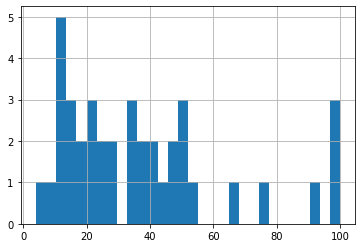

In [39]:
values_percTT = df_exc["percTT"]

nb_cl = round(1 + np.log2(len(values_percTT))) * 5
hist, bins = np.histogram(values_percTT, bins=nb_cl)

values_percTT.hist(bins=bins)


In [40]:
b = round(bins[np.argmax(hist) + 1], 3)
ind_exc = df_exc[df_exc["percTT"] <= b]["percTT"].count()
ind_exc_perc = round(ind_exc / len(df_exc) * 100, 3)
print(f"Seuil: {b} %\nNombre d'individus < au seuil: {ind_exc}\n% individus < au seuil: {ind_exc_perc} %")


Seuil: 13.573 %
Nombre d'individus < au seuil: 7
% individus < au seuil: 17.949 %


Je vais droper les colonnes "LargestPropertyUseType", "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseType", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseType", "ThirdLargestPropertyUseTypeGFA", "BuildingType" dont je ne me servirai plus

In [41]:
a_exclure = df_exc.index[df_exc["percTT"] > b]
f_datas = n_datas.drop(index=a_exclure, columns=["LargestPropertyUseType", "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseType",
    "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseType", "ThirdLargestPropertyUseTypeGFA", "BuildingType",
    "ListOfAllPropertyUseTypes"]).reset_index(drop=True)

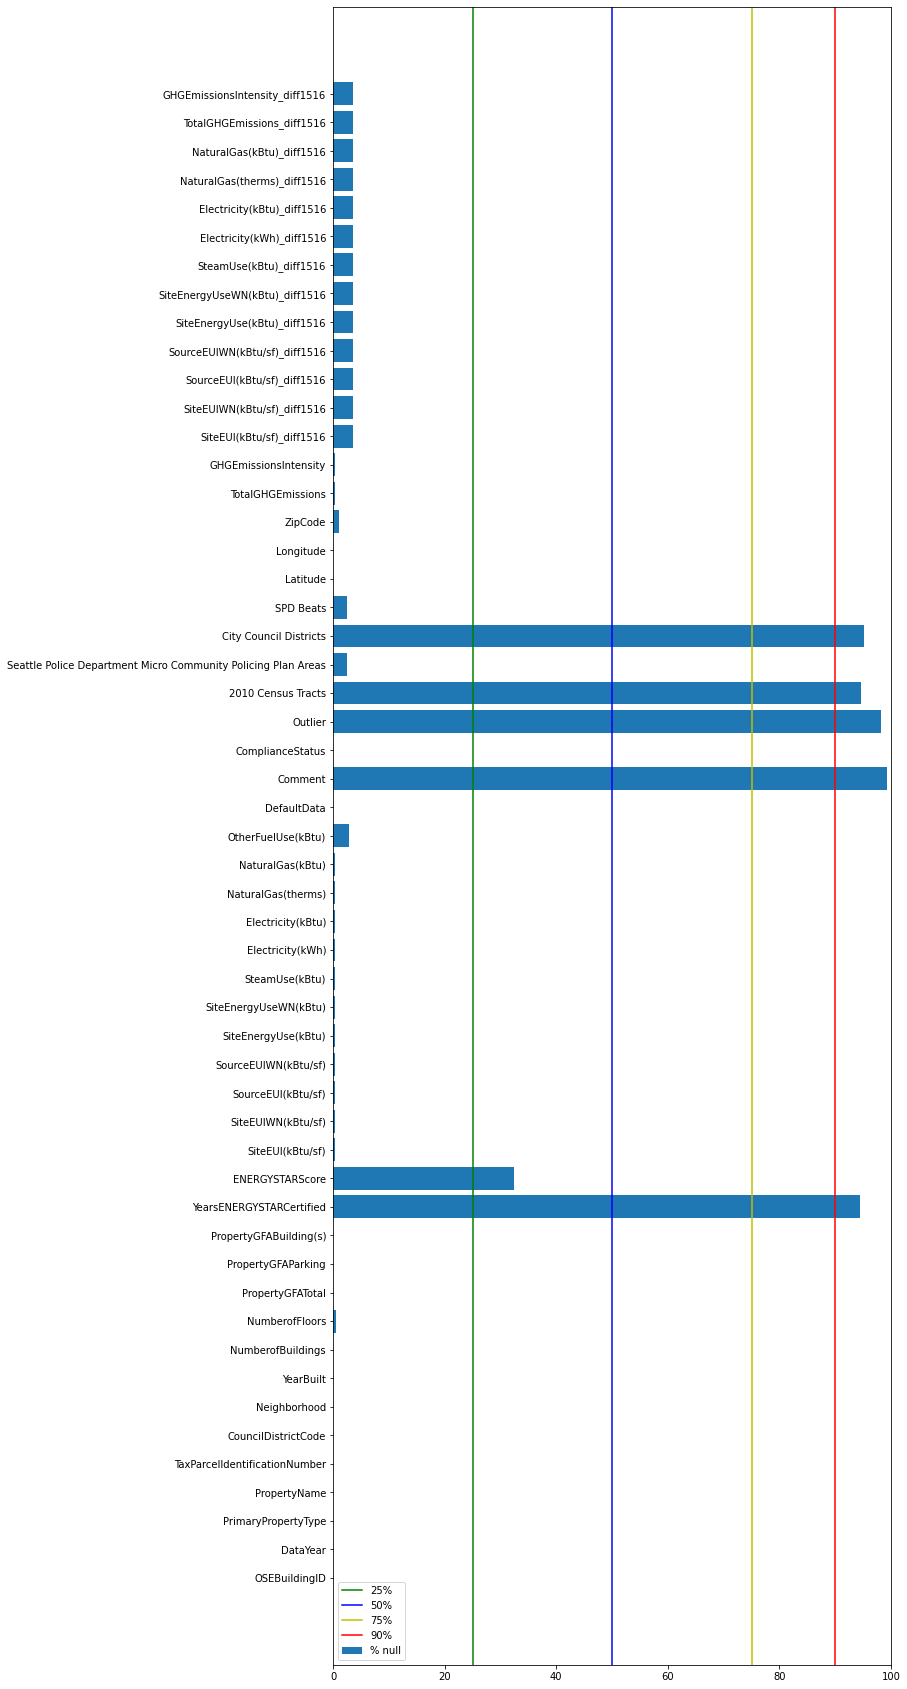

In [42]:
n_ind = len(f_datas.index)

col_null = []
for col in f_datas.columns:
    nb_null = f_datas[col].isnull().sum()
    perc_null = round(nb_null / n_ind * 100, 3)
    col_null.append(perc_null)

fig = plt.figure(figsize=(10, len(n_full.columns) / 2))
plt.barh(f_datas.columns, col_null, label="% null")
plt.axvline(25, color="g", label="25%")
plt.axvline(50, color="b", label="50%")
plt.axvline(75, color="y", label="75%")
plt.axvline(90, color="r", label="90%")
plt.xlim(0, 100)
plt.legend()
plt.show()


"SPD Beats" = Police sector area => Pas intéressant

"City Council Districts" = Quartiers de Seattle => Pas intéressant

"Seattle Police Department Micro Community Policing Plan Areas" = Plan d'intervention personnalisé par quartier => Pas intéressant

"2010 Census Tracts" = Secteur de recensement en 2010 => Pas intéressant

*** "Outlier" = valeurs aberrantes => Intéressant mais pas complet

*** "ComplianceStatus" = Satifait ou pas les exigences d'analyses comparatives énergetiques pour l'année en cours, si les données sont fournies pour la comparaison => Intéressant

*** "DefaultData" = The property used default data for at least one property characteristic => A garder pour valider des valeurs en reliant à ComplianceStatus

"YearsENERGYSTARCertified" => Pas intéressant

"Neighborhood" = Quartier de Seattle => Pas intéressant vu que je garde "City Council Districts"

*** "CouncilDistrictCode" = Code des districts => A garder pour étudier de potentiels clusters

"TaxParcelIdentificationNumber" = ID de taxe de propriété => Pas intéressant

"PropertyName" = Nom de la propriété => Pas intéressant


In [43]:
n_datas = f_datas.drop(["SPD Beats", "City Council Districts", "Seattle Police Department Micro Community Policing Plan Areas",
    "2010 Census Tracts", "YearsENERGYSTARCertified", "Neighborhood", "TaxParcelIdentificationNumber",
    "PropertyName"], axis=1)


In [44]:
n_datas.to_csv("./Pélec_02_nettoyage_global.csv", index=False)